In [156]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [157]:
steam_df = pd.read_csv("../code_alt/data/smart_hans_07252022_153509_5_162-201_08_mky_raphi_im_hintergrund.csv")
steam_df = steam_df.iloc[:600]
steam_df.head()

,Unnamed: 0,nosetip_x,nosetip_y,chin_x,chin_y,left_eye_corner_x,left_eye_corner_y,right_eye_corner_x,right_eye_corner_y,left_mouth_corner_x,left_mouth_corner_y,right_mouth_corner_x,right_mouth_corner_y,nose_end_point_x,nose_end_point_y,head_pose1_x,head_pose1_y,head_pose2_x,head_pose2_y
0,0,600.0,1321.0,536.0,1535.0,409.0,1214.0,650.0,1183.0,465.0,1411.0,612.0,1394.0,1401,1705,588,1326,3137,2183
1,1,603.0,1324.0,536.0,1537.0,410.0,1215.0,655.0,1180.0,467.0,1416.0,613.0,1396.0,1442,1755,592,1329,2983,2079
2,2,602.0,1322.0,539.0,1537.0,408.0,1215.0,655.0,1179.0,466.0,1413.0,617.0,1394.0,1427,1747,591,1327,3404,2386
3,3,600.0,1320.0,533.0,1536.0,407.0,1214.0,653.0,1181.0,464.0,1415.0,610.0,1396.0,1410,1728,588,1327,3187,2243
4,4,597.0,1322.0,529.0,1535.0,406.0,1212.0,651.0,1183.0,462.0,1410.0,606.0,1395.0,1403,1735,585,1327,3105,2214


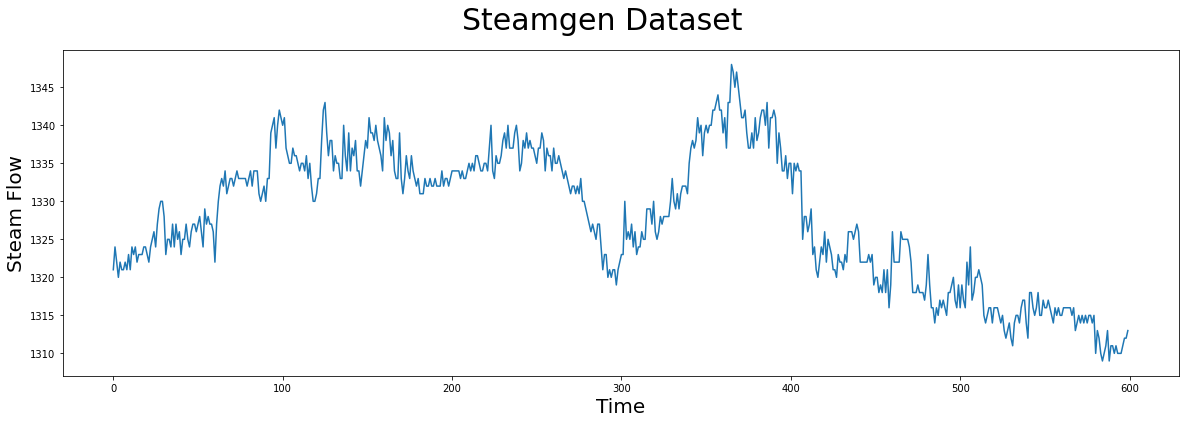

In [158]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['nosetip_y'].values)
plt.show()

In [159]:
m = 15
mp = stumpy.stump(steam_df["nosetip_y"], m)

In [160]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 364


In [161]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 259


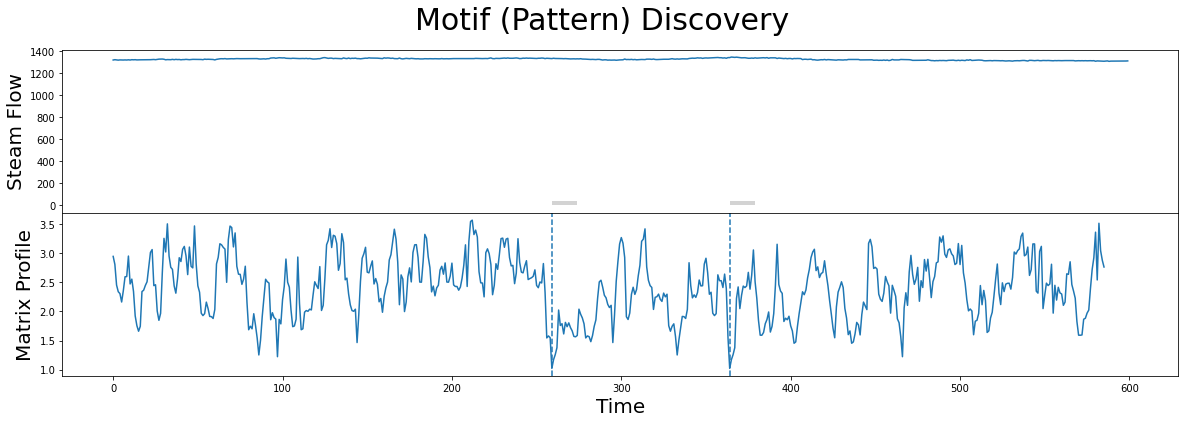

In [162]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(steam_df['nosetip_y'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [163]:
discord_idx = np.argsort(mp[:, 0])[-1]

print(f"The discord is located at index {discord_idx}")

The discord is located at index 212


In [164]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is 3.5719084370173086 units away


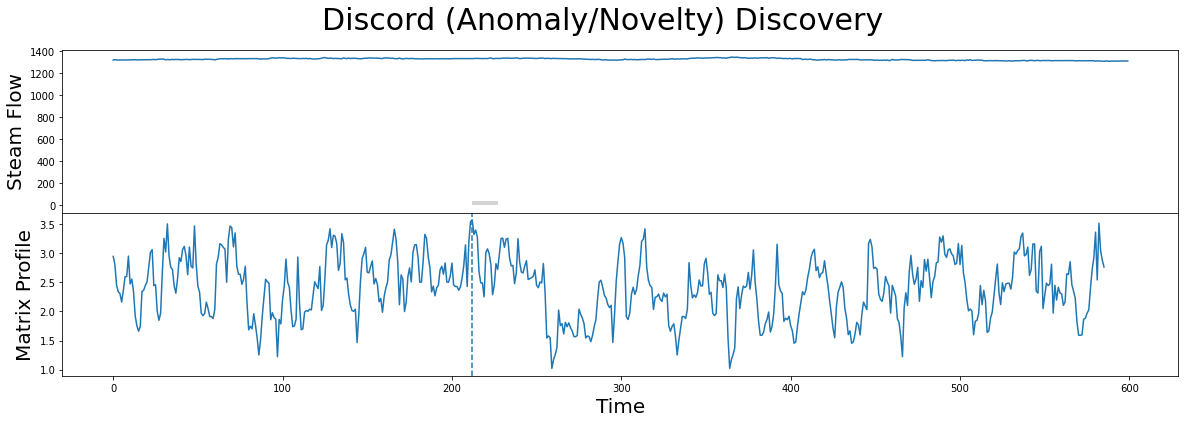

In [165]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['nosetip_y'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()